In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from random import randint
import pickle,glob, cv2
from shared.segmentationHelpers import get_num_images, generate_image_segmentation_labels

In [2]:
def loadModel(configName):
    path = '../models/segmenters/'+configName+'/'
    modelPath = path + 'model'
    historyPath = path +'history.pickle'
    
    model = tf.keras.models.load_model(modelPath)
    with open(historyPath, 'rb') as f:
        history = pickle.load(f)
        
    return (model,history)

In [3]:
def showLoss(history):
    loss = history['loss']
    val_loss = history['val_loss']
    plt.plot(loss, label='Training')
    plt.plot(val_loss, label='Validation') 
    plt.ylabel('Loss (Binary CE)')
    plt.xlabel('Epoc')
    plt.legend()
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


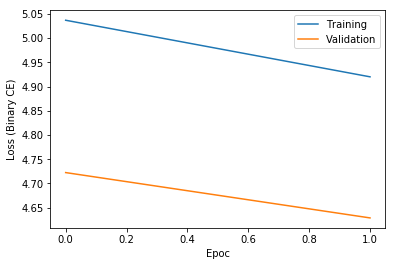

In [6]:
(model,history)=loadModel('config00')
showLoss(history)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


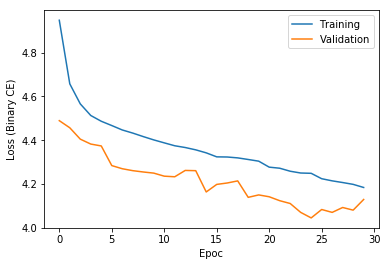

In [4]:
(model,history)=loadModel('config2')
showLoss(history)
#Decoding images
BATCH_SIZE_TEST = 8
NUM_SAMPLES_TEST =  get_num_images('test','foregroundBackground', '../data/')
STEPS_TEST = ceil(NUM_SAMPLES_TEST/BATCH_SIZE_TEST)

decoded_imgs = model.predict_generator(generate_image_segmentation_labels('test','foregroundBackground' ,BATCH_SIZE_TEST, dataDir='../data/',squashOutput=True),steps=STEPS_TEST)

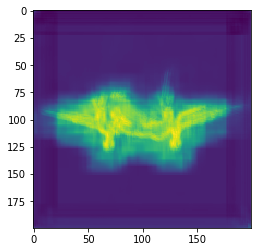

In [45]:
decoded_imgs.shape
plt.imshow(decoded_imgs[291,:,:,0])